# Model Development and Evaluation - Bank Churn Prediction

This notebook performs:
- Data preprocessing and feature engineering
- Training multiple ML models (Logistic Regression, Random Forest, XGBoost)
- Hyperparameter tuning
- Model evaluation and comparison
- Visualization of results
- Model selection and persistence

## Table of Contents
1. [Setup and Data Loading](#1-setup-and-data-loading)
2. [Data Preprocessing](#2-data-preprocessing)
3. [Model Training](#3-model-training)
4. [Model Evaluation](#4-model-evaluation)
5. [Model Comparison](#5-model-comparison)
6. [Visualizations](#6-visualizations)
7. [Feature Importance](#7-feature-importance)
8. [Model Selection and Saving](#8-model-selection-and-saving)


## 1. Setup and Data Loading


In [25]:
# Import necessary libraries
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path

# Add src directory to path for imports
sys.path.append(str(Path('../').resolve()))
from src.utils import load_data
from src.feature_engineering import engineer_all_features
from src.data_preprocessing import preprocess_data
from src.model_training import ModelTrainer
from src.model_evaluation import ModelEvaluator

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")
print(f"Working directory: {os.getcwd()}")


Libraries imported successfully!
Working directory: C:\Users\yuvi2\Downloads\Bank Churn\notebooks


In [2]:
# Load the dataset
data_path = '../data/Churn Modeling.csv'
df = load_data(data_path)

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()


Dataset loaded successfully!
Shape: (10000, 14)

First few rows:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 2. Data Preprocessing


In [3]:
# Apply feature engineering
print("Applying feature engineering...")
df_engineered = engineer_all_features(
    df,
    include_age_groups=True,
    include_balance_groups=True,
    include_tenure_groups=True,
    include_interactions=True,
    include_aggregated=True,
    include_polynomial=False
)

print(f"Original features: {len(df.columns)}")
print(f"Engineered features: {len(df_engineered.columns)}")
print(f"New features created: {len(df_engineered.columns) - len(df.columns)}")


Applying feature engineering...
Original features: 14
Engineered features: 27
New features created: 13


In [4]:
# Preprocess data (encoding, scaling, splitting)
print("Preprocessing data...")
print("=" * 60)

preprocessed = preprocess_data(
    df_engineered,
    target_col='Exited',
    test_size=0.2,
    val_size=0.2,
    random_state=42,
    use_smote=True  # Use SMOTE for class imbalance
)

print("\nData split:")
print(f"  Training set:   {len(preprocessed['X_train']):,} samples")
print(f"  Validation set: {len(preprocessed['X_val']):,} samples")
print(f"  Test set:       {len(preprocessed['X_test']):,} samples")
print(f"\nAfter SMOTE resampling:")
print(f"  Training set:   {len(preprocessed['X_train_resampled']):,} samples")
print(f"\nFeature count: {len(preprocessed['X_train'].columns)} features")


Preprocessing data...

Data split:
  Training set:   6,000 samples
  Validation set: 2,000 samples
  Test set:       2,000 samples

After SMOTE resampling:
  Training set:   6,000 samples

Feature count: 32 features


In [5]:
# Check class distribution
print("Class distribution in training set (before SMOTE):")
print(preprocessed['y_train'].value_counts())
print(f"\nChurn rate: {preprocessed['y_train'].mean():.2%}")

print("\nClass distribution in training set (after SMOTE):")
print(preprocessed['y_train_resampled'].value_counts())
print(f"\nChurn rate: {preprocessed['y_train_resampled'].mean():.2%}")

print("\nClass distribution in test set:")
print(preprocessed['y_test'].value_counts())
print(f"\nChurn rate: {preprocessed['y_test'].mean():.2%}")


Class distribution in training set (before SMOTE):
Exited
0    4777
1    1223
Name: count, dtype: int64

Churn rate: 20.38%

Class distribution in training set (after SMOTE):
Exited
0    4777
1    1223
Name: count, dtype: int64

Churn rate: 20.38%

Class distribution in test set:
Exited
0    1593
1     407
Name: count, dtype: int64

Churn rate: 20.35%


## 3. Model Training


In [6]:
# Initialize model trainer
trainer = ModelTrainer(random_state=42, cv_folds=5)

print("=" * 60)
print("TRAINING MODELS")
print("=" * 60)
print("\nNote: This may take several minutes with hyperparameter tuning...")


TRAINING MODELS

Note: This may take several minutes with hyperparameter tuning...


In [7]:
# Train Logistic Regression
print("\n" + "-" * 60)
print("1. LOGISTIC REGRESSION")
print("-" * 60)

result_lr = trainer.train_logistic_regression(
    preprocessed['X_train_resampled'],
    preprocessed['y_train_resampled'],
    tune_hyperparameters=True  # Set to False for faster training
)

print(f"\nTraining completed!")
print(f"Best CV Score (ROC-AUC): {result_lr['cv_score']:.4f}")
if result_lr['best_params']:
    print(f"Best Parameters: {result_lr['best_params']}")



------------------------------------------------------------
1. LOGISTIC REGRESSION
------------------------------------------------------------
Training Logistic Regression...
  Best parameters: {'C': 1, 'max_iter': 200, 'penalty': 'l1', 'solver': 'saga'}
  Best CV score (ROC-AUC): 0.7934

Training completed!
Best CV Score (ROC-AUC): 0.7934
Best Parameters: {'C': 1, 'max_iter': 200, 'penalty': 'l1', 'solver': 'saga'}


In [8]:
# Train Random Forest
print("\n" + "-" * 60)
print("2. RANDOM FOREST")
print("-" * 60)

result_rf = trainer.train_random_forest(
    preprocessed['X_train_resampled'],
    preprocessed['y_train_resampled'],
    tune_hyperparameters=True  # Set to False for faster training
)

print(f"\nTraining completed!")
print(f"Best CV Score (ROC-AUC): {result_rf['cv_score']:.4f}")
if result_rf['best_params']:
    print(f"Best Parameters: {result_rf['best_params']}")



------------------------------------------------------------
2. RANDOM FOREST
------------------------------------------------------------
Training Random Forest...
  Best parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
  Best CV score (ROC-AUC): 0.8490

Training completed!
Best CV Score (ROC-AUC): 0.8490
Best Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [9]:
# Train XGBoost (if available)
try:
    print("\n" + "-" * 60)
    print("3. XGBOOST")
    print("-" * 60)
    
    result_xgb = trainer.train_xgboost(
        preprocessed['X_train_resampled'],
        preprocessed['y_train_resampled'],
        tune_hyperparameters=True  # Set to False for faster training
    )
    
    print(f"\nTraining completed!")
    print(f"Best CV Score (ROC-AUC): {result_xgb['cv_score']:.4f}")
    if result_xgb['best_params']:
        print(f"Best Parameters: {result_xgb['best_params']}")
    
    xgb_available = True
except ImportError:
    print("\nXGBoost not available. Skipping...")
    xgb_available = False



------------------------------------------------------------
3. XGBOOST
------------------------------------------------------------
Training XGBoost...
  Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 1, 'subsample': 0.8}
  Best CV score (ROC-AUC): 0.8631

Training completed!
Best CV Score (ROC-AUC): 0.8631
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 1, 'subsample': 0.8}


In [10]:
# Summary of training results
print("\n" + "=" * 60)
print("TRAINING SUMMARY")
print("=" * 60)

print(f"\nLogistic Regression CV Score: {result_lr['cv_score']:.4f}")
print(f"Random Forest CV Score:       {result_rf['cv_score']:.4f}")
if xgb_available:
    print(f"XGBoost CV Score:             {result_xgb['cv_score']:.4f}")

# Get best model from training
best_train_name, best_train_model = trainer.get_best_model()
print(f"\nBest model (by CV score): {best_train_name}")
print(f"CV Score: {trainer.cv_scores[best_train_name]:.4f}")



TRAINING SUMMARY

Logistic Regression CV Score: 0.7934
Random Forest CV Score:       0.8490
XGBoost CV Score:             0.8631

Best model (by CV score): xgboost
CV Score: 0.8631


## 4. Model Evaluation


In [11]:
# Initialize evaluator
evaluator = ModelEvaluator()

print("=" * 60)
print("EVALUATING MODELS ON TEST SET")
print("=" * 60)


EVALUATING MODELS ON TEST SET


In [12]:
# Evaluate Logistic Regression
print("\nEvaluating Logistic Regression...")
eval_lr = evaluator.evaluate_model(
    result_lr['model'],
    preprocessed['X_test'],
    preprocessed['y_test'],
    model_name='logistic_regression'
)

print(f"  Accuracy:  {eval_lr['accuracy']:.4f}")
print(f"  Precision: {eval_lr['precision']:.4f}")
print(f"  Recall:    {eval_lr['recall']:.4f}")
print(f"  F1-Score:  {eval_lr['f1_score']:.4f}")
print(f"  ROC-AUC:   {eval_lr['roc_auc']:.4f}")



Evaluating Logistic Regression...
  Accuracy:  0.7500
  Precision: 0.4315
  Recall:    0.7199
  F1-Score:  0.5396
  ROC-AUC:   0.8097


In [13]:
# Evaluate Random Forest
print("\nEvaluating Random Forest...")
eval_rf = evaluator.evaluate_model(
    result_rf['model'],
    preprocessed['X_test'],
    preprocessed['y_test'],
    model_name='random_forest'
)

print(f"  Accuracy:  {eval_rf['accuracy']:.4f}")
print(f"  Precision: {eval_rf['precision']:.4f}")
print(f"  Recall:    {eval_rf['recall']:.4f}")
print(f"  F1-Score:  {eval_rf['f1_score']:.4f}")
print(f"  ROC-AUC:   {eval_rf['roc_auc']:.4f}")



Evaluating Random Forest...
  Accuracy:  0.8420
  Precision: 0.6118
  Recall:    0.6118
  F1-Score:  0.6118
  ROC-AUC:   0.8602


In [14]:
# Evaluate XGBoost (if available)
if xgb_available:
    print("\nEvaluating XGBoost...")
    eval_xgb = evaluator.evaluate_model(
        result_xgb['model'],
        preprocessed['X_test'],
        preprocessed['y_test'],
        model_name='xgboost'
    )
    
    print(f"  Accuracy:  {eval_xgb['accuracy']:.4f}")
    print(f"  Precision: {eval_xgb['precision']:.4f}")
    print(f"  Recall:    {eval_xgb['recall']:.4f}")
    print(f"  F1-Score:  {eval_xgb['f1_score']:.4f}")
    print(f"  ROC-AUC:   {eval_xgb['roc_auc']:.4f}")



Evaluating XGBoost...
  Accuracy:  0.8695
  Precision: 0.8017
  Recall:    0.4767
  F1-Score:  0.5978
  ROC-AUC:   0.8676


## 5. Model Comparison


In [15]:
# Compare all models
print("=" * 60)
print("MODEL COMPARISON")
print("=" * 60)

comparison_df = evaluator.compare_models(metric='roc_auc')
print("\nComparison by ROC-AUC:")
print(comparison_df.to_string(index=False))


MODEL COMPARISON

Comparison by ROC-AUC:
              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC   PR-AUC  Specificity  Sensitivity
logistic_regression    0.7500   0.431517 0.719902  0.539595 0.809665 0.584647     0.757690     0.719902
      random_forest    0.8420   0.611794 0.611794  0.611794 0.860198 0.676706     0.900816     0.611794
            xgboost    0.8695   0.801653 0.476658  0.597843 0.867587 0.715152     0.969868     0.476658


In [16]:
# Get best model
best_name, best_results = evaluator.get_best_model(metric='roc_auc')

print("\n" + "=" * 60)
print(f"BEST MODEL: {best_name.upper()}")
print("=" * 60)
print(evaluator.generate_report(best_name))



BEST MODEL: XGBOOST

MODEL EVALUATION REPORT: xgboost

PERFORMANCE METRICS:
  Accuracy:        0.8695
  Precision:       0.8017
  Recall:          0.4767
  F1-Score:        0.5978
  ROC-AUC:         0.8676
  PR-AUC:          0.7152
  Specificity:     0.9699
  Sensitivity:     0.4767

CONFUSION MATRIX:
  True Negatives:  1545
  False Positives: 48
  False Negatives: 213
  True Positives:  194

THRESHOLD-BASED METRICS (threshold = 0.5):
  Accuracy:        0.8695
  Precision:       0.8017
  Recall:          0.4767
  F1-Score:        0.5978

MODEL TYPE: XGBClassifier



## 6. Visualizations


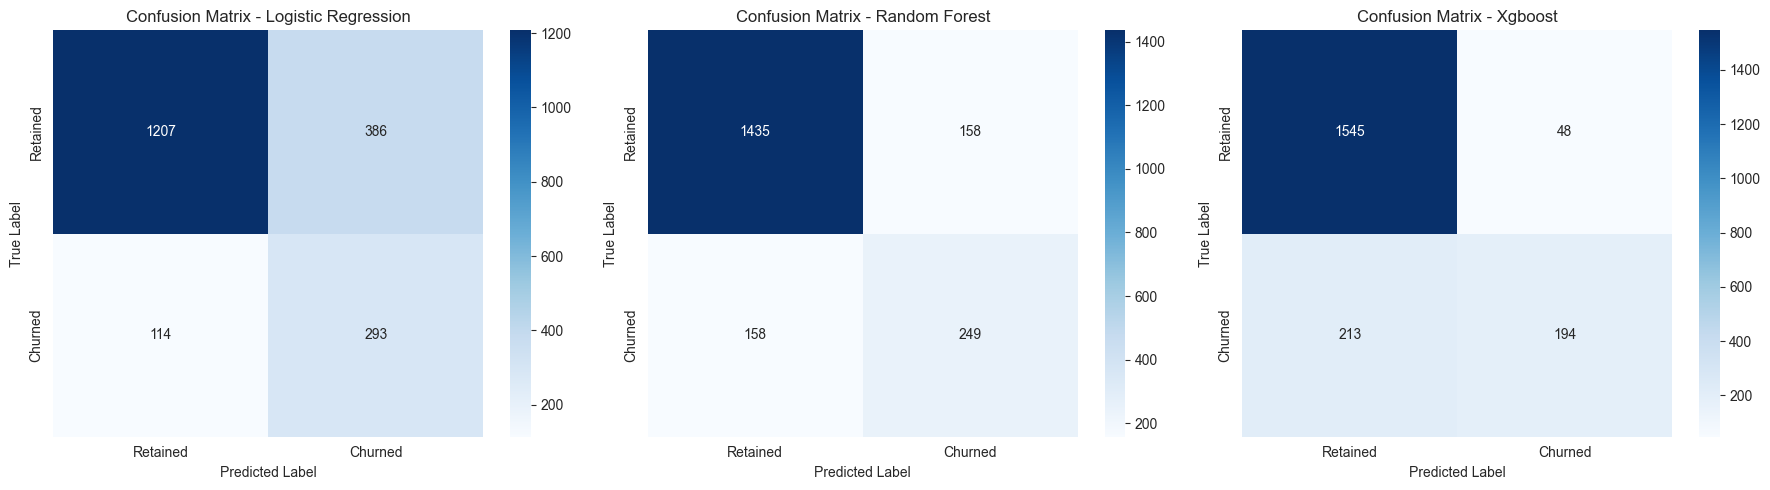

In [17]:
# Plot confusion matrices for all models
fig, axes = plt.subplots(1, 2 if not xgb_available else 3, figsize=(18, 5))
if not isinstance(axes, np.ndarray):
    axes = [axes]

model_names = ['logistic_regression', 'random_forest']
if xgb_available:
    model_names.append('xgboost')

for idx, model_name in enumerate(model_names):
    ax = axes[idx]
    cm = evaluator.evaluation_results[model_name]['confusion_matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
               xticklabels=['Retained', 'Churned'],
               yticklabels=['Retained', 'Churned'])
    ax.set_ylabel('True Label')
    ax.set_xlabel('Predicted Label')
    ax.set_title(f'Confusion Matrix - {model_name.replace("_", " ").title()}')

plt.tight_layout()
plt.show()


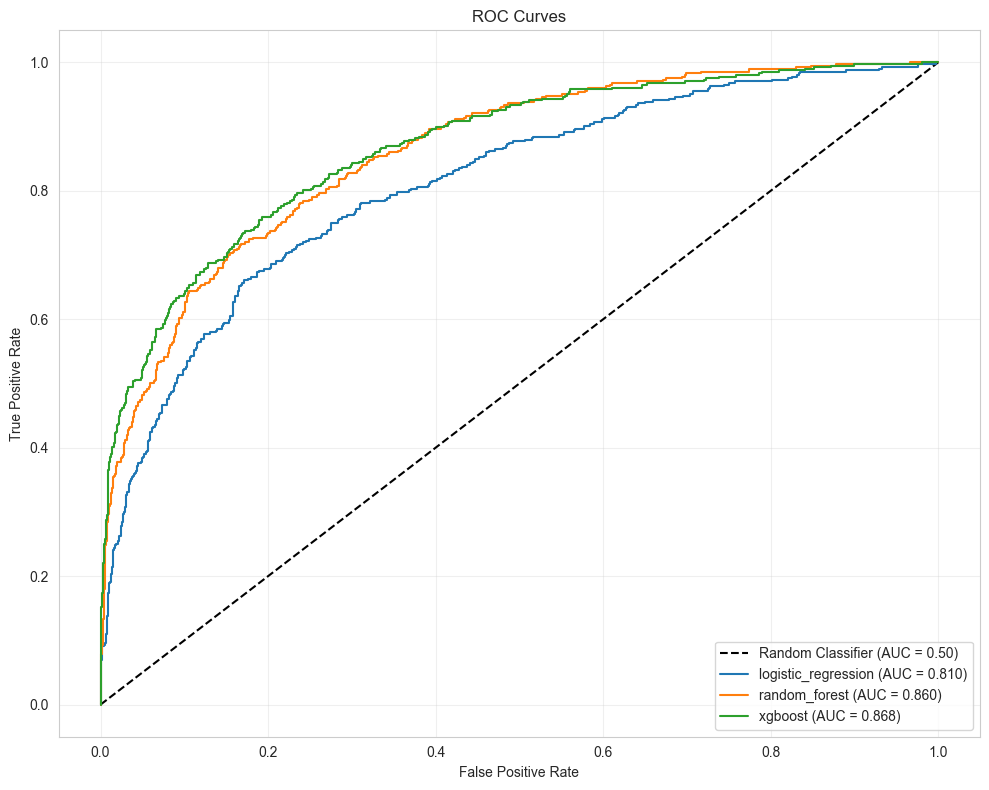

In [18]:
# Plot ROC curves
fig = evaluator.plot_roc_curve()
plt.show()


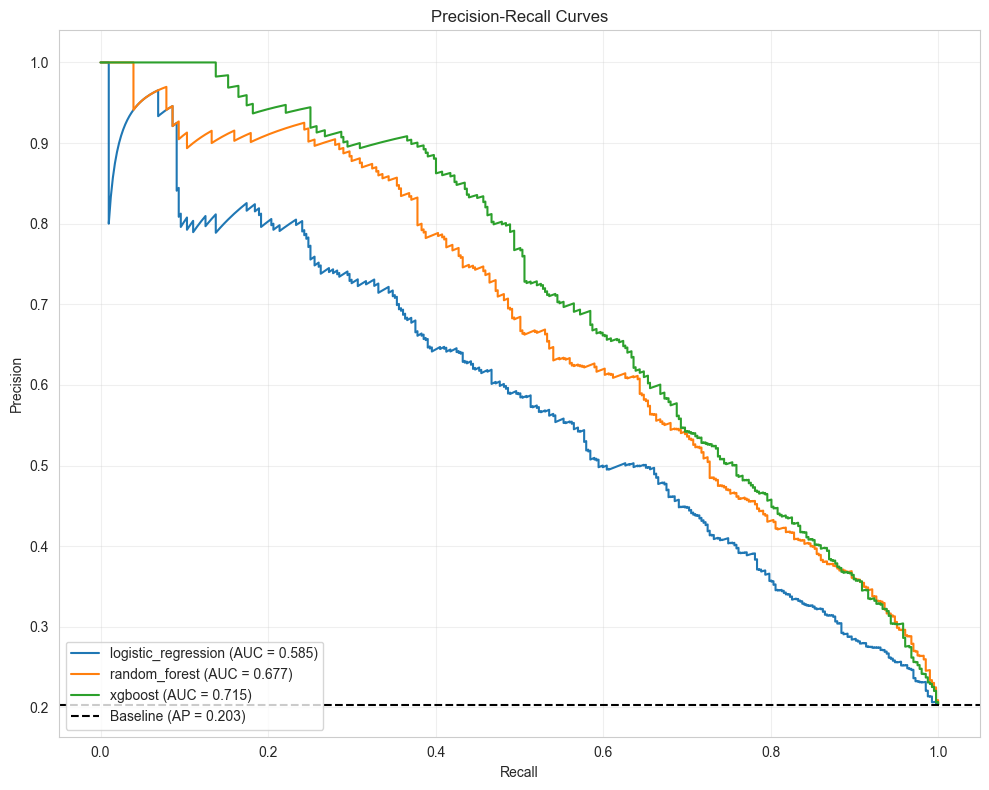

In [19]:
# Plot Precision-Recall curves
fig = evaluator.plot_precision_recall_curve()
plt.show()


## 7. Feature Importance


Feature Importance - Random Forest


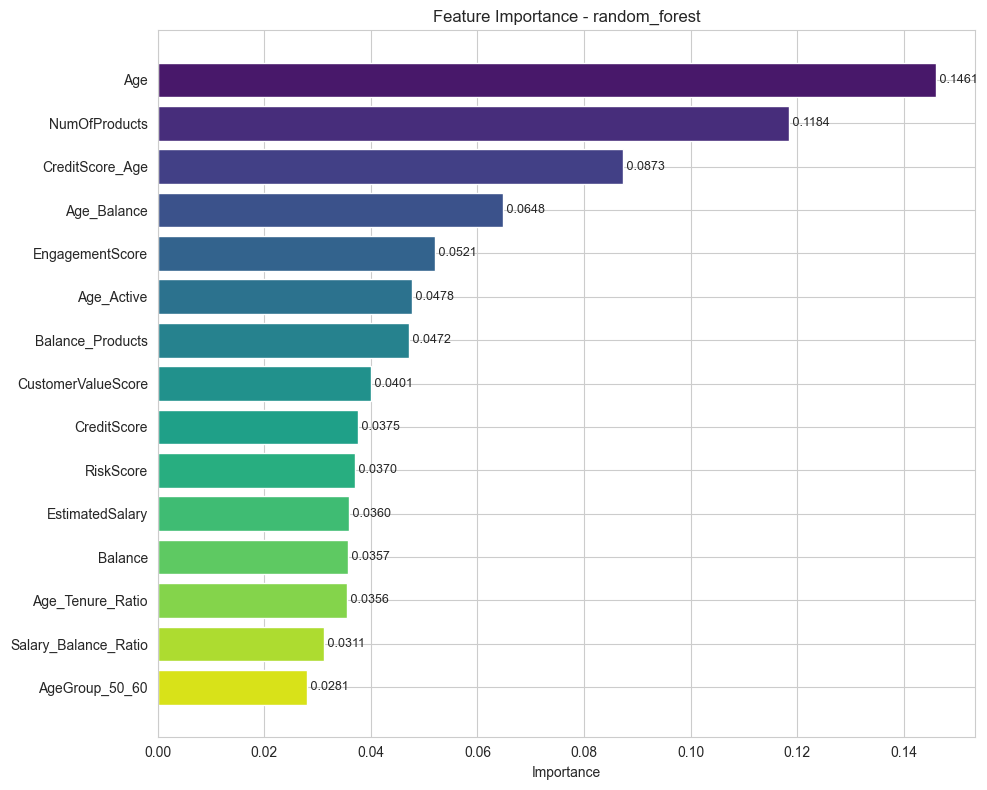

In [20]:
# Get feature names
feature_names = preprocessed['X_train'].columns.tolist()

# Plot feature importance for Random Forest
if 'random_forest' in evaluator.models:
    print("Feature Importance - Random Forest")
    fig = evaluator.plot_feature_importance(
        'random_forest',
        feature_names,
        top_n=15
    )
    plt.show()


Feature Importance - XGBoost


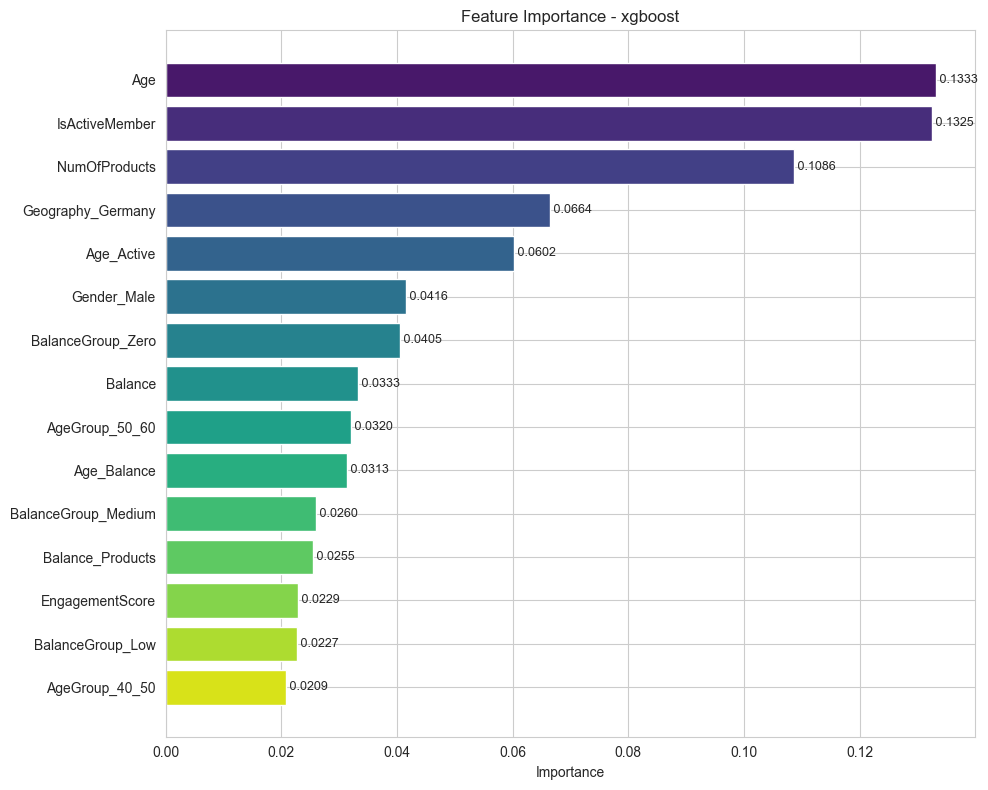

In [21]:
# Plot feature importance for XGBoost (if available)
if xgb_available and 'xgboost' in evaluator.models:
    print("Feature Importance - XGBoost")
    fig = evaluator.plot_feature_importance(
        'xgboost',
        feature_names,
        top_n=15
    )
    plt.show()


## 8. Model Selection and Saving


In [22]:
# Save the best model
best_model_name, best_model = trainer.get_best_model()
best_model_obj = trainer.models[best_model_name]

print(f"Saving best model: {best_model_name}")
print(f"ROC-AUC Score: {evaluator.evaluation_results[best_model_name]['roc_auc']:.4f}")

# Create models directory if it doesn't exist
os.makedirs('../models', exist_ok=True)

# Save best model
model_path = f'../models/best_model_{best_model_name}.pkl'
trainer.save_model(best_model_name, model_path)
print(f"Model saved to: {model_path}")

# Save preprocessor
preprocessor_path = '../models/preprocessor.pkl'
preprocessed['preprocessor'].save_preprocessor(preprocessor_path)
print(f"Preprocessor saved to: {preprocessor_path}")


Saving best model: xgboost
ROC-AUC Score: 0.8676
Model 'xgboost' saved to ../models/best_model_xgboost.pkl
Model saved to: ../models/best_model_xgboost.pkl
Preprocessor saved to: ../models/preprocessor.pkl


In [23]:
# Save all models (optional)
print("\nSaving all trained models...")
for model_name in trainer.models.keys():
    model_path = f'../models/{model_name}.pkl'
    trainer.save_model(model_name, model_path)
    print(f"  {model_name}: {model_path}")



Saving all trained models...
Model 'logistic_regression' saved to ../models/logistic_regression.pkl
  logistic_regression: ../models/logistic_regression.pkl
Model 'random_forest' saved to ../models/random_forest.pkl
  random_forest: ../models/random_forest.pkl
Model 'xgboost' saved to ../models/xgboost.pkl
  xgboost: ../models/xgboost.pkl


In [24]:
# Final summary
print("\n" + "=" * 60)
print("FINAL SUMMARY")
print("=" * 60)

print(f"\nBest Model: {best_model_name}")
print(f"Test Set Performance:")
best_eval = evaluator.evaluation_results[best_model_name]
print(f"  Accuracy:  {best_eval['accuracy']:.4f}")
print(f"  Precision: {best_eval['precision']:.4f}")
print(f"  Recall:    {best_eval['recall']:.4f}")
print(f"  F1-Score:  {best_eval['f1_score']:.4f}")
print(f"  ROC-AUC:   {best_eval['roc_auc']:.4f}")

print("\n" + "=" * 60)
print("Modeling complete! Models saved to ../models/")
print("=" * 60)



FINAL SUMMARY

Best Model: xgboost
Test Set Performance:
  Accuracy:  0.8695
  Precision: 0.8017
  Recall:    0.4767
  F1-Score:  0.5978
  ROC-AUC:   0.8676

Modeling complete! Models saved to ../models/
